# Image processing

### Load libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Load image

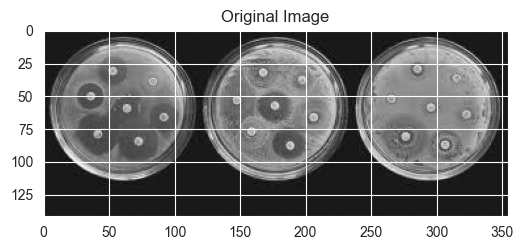

In [16]:
img = cv2.imread("bac.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(6,6))
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.show()


### Select a line on the y-axis

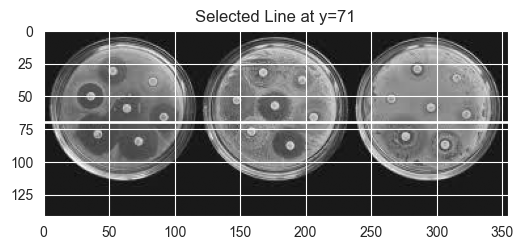

In [17]:
y_line = img.shape[0] // 2  # Middle line of the image
line_pixels = img[y_line, :]  # Store all pixels in an array

# Display the selected line on the image

img_line = img.copy()
img_line[y_line-1:y_line+1, :] = 255
plt.figure(figsize=(6,6))
plt.imshow(img_line, cmap='gray')
plt.title(f"Selected Line at y={y_line}")
plt.show()

### Normalize pixel values

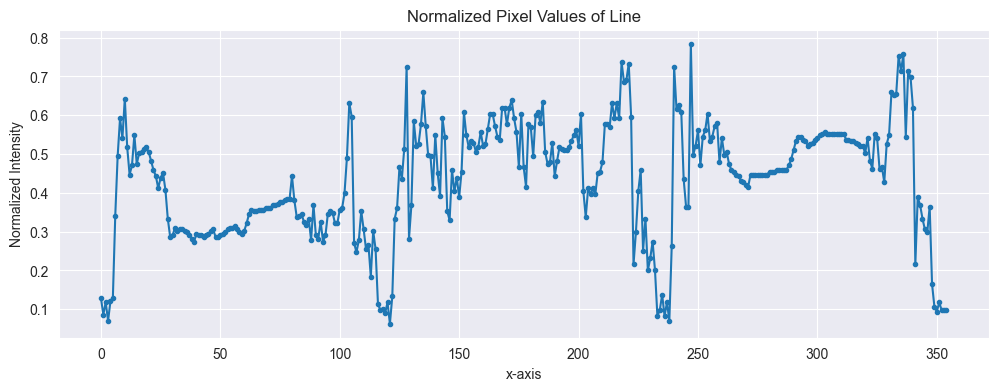

In [18]:
line_normalized = line_pixels / 255.0

plt.figure(figsize=(12,4))
plt.plot(line_normalized, marker='o', linestyle='-', markersize=3)
plt.title("Normalized Pixel Values of Line")
plt.xlabel("x-axis")
plt.ylabel("Normalized Intensity")
plt.show()

Pixel values are between 0 and 255. So dividing by 255 scales the values to be between 0 and 1.

Now we have the plot of normalized pixel values of line.

### Remove outliers

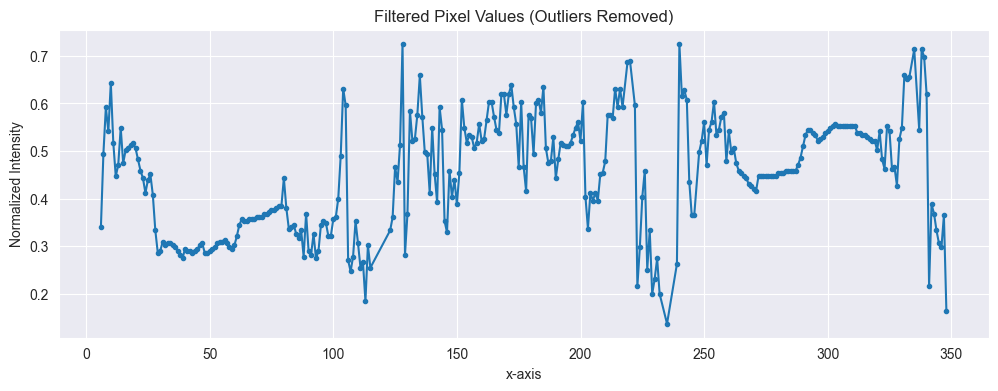

In [19]:
# Calculate mean and standard deviation
mean = np.mean(line_normalized)
std = np.std(line_normalized)

# Any pixel outside mean ± 2std is removed as an outlier.
threshold = 2
filtered_indices = np.where((line_normalized > mean - threshold*std) & (line_normalized < mean + threshold*std))[0]
line_filtered = line_normalized[filtered_indices]

plt.figure(figsize=(12,4))
plt.plot(filtered_indices, line_filtered, marker='o', linestyle='-', markersize=3)
plt.title("Filtered Pixel Values (Outliers Removed)")
plt.xlabel("x-axis")
plt.ylabel("Normalized Intensity")
plt.show()

Here we have the plot of normalized pixel values of line without the outliers. 

### Normalized Pixel Values of Selected Line

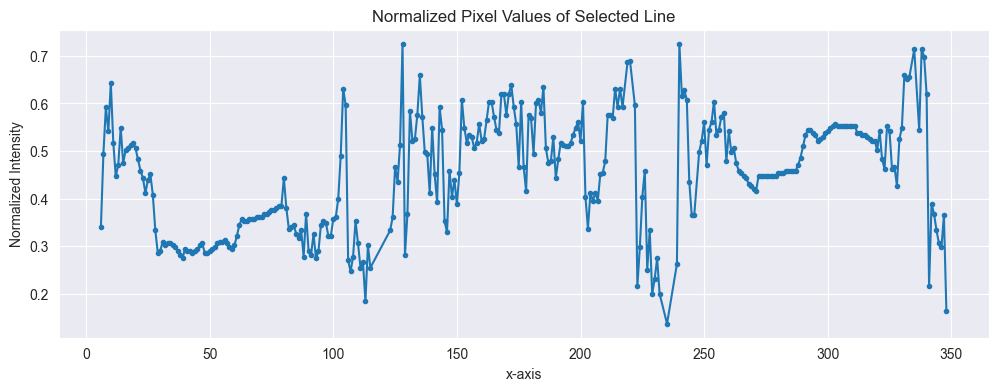

In [20]:
plt.figure(figsize=(12,4))
plt.plot(filtered_indices, line_filtered, marker='o', linestyle='-', markersize=3)
plt.title("Normalized Pixel Values of Selected Line")
plt.xlabel("x-axis")
plt.ylabel("Normalized Intensity")
plt.show()

**This section actually shows the brightness intensity of each pixel along the selected line as a line plot. The circular points represent each pixel, and the line connecting them illustrates the variations in brightness.**


### K-means clustring

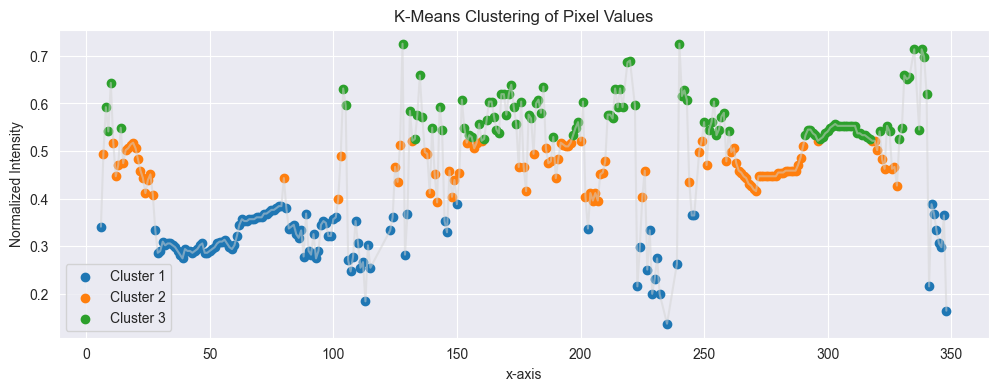

In [24]:
def kmeans_numpy(data, k=3, max_iters=100):

    centroids = np.random.choice(data, k, replace=False) # centroids (center of each cluster)

    for i in range(max_iters):
        distances = np.abs(data[:, None] - centroids[None, :])
        labels = np.argmin(distances, axis=1) # labels (class of each pixel)
        new_centroids = np.array([data[labels==j].mean() for j in range(k)])
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

# Run K-Means

k = 3
labels, centroids = kmeans_numpy(line_filtered, k=k)

plt.figure(figsize=(12,4))
for i in range(k):
    plt.scatter(filtered_indices[labels==i], line_filtered[labels==i], label=f"Cluster {i+1}")
plt.plot(filtered_indices, line_filtered, color='lightgray', alpha=0.5)
plt.title("K-Means Clustering of Pixel Values")
plt.xlabel("x-axis")
plt.ylabel("Normalized Intensity")
plt.legend()
plt.show()

In this plot, the data are divided into k clusters based on the K-Means algorithm. Each cluster is shown in a different color on the chart, and the gray background plot represents the data.

The K-Means plot shows the clustering of pixels into three clusters: blue (low intensity, 0.2–0.3), orange (medium intensity, 0.4–0.5), and green (high intensity, 0.5–0.7). The clusters are grouped based on normalized intensity, with overlap between 50–150 and distinct centroids across different x-axis ranges.